In [1]:
from sklearn.datasets import load_svmlight_file

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
import numpy as np

In [5]:
data=load_svmlight_file(r'F:\\机器学习实验\\housing_scale.txt')

In [6]:
X=data[0]

In [7]:
y=data[1]

In [8]:
X=X.todense()

In [9]:
X_train,X_validation,y_train,y_validation=train_test_split(X,y,test_size=0.25,random_state=42)#分割数据集

In [10]:
y_train=np.reshape(y_train,(len(y_train),1))
y=np.mat(y)

In [11]:
n=np.shape(X_train)[0]

In [12]:
X_train=np.hstack((X_train,np.ones((n,1))))

In [13]:
n=np.shape(X_validation)[0]
X_validation=np.hstack((X_validation,np.ones((n,1))))

In [14]:
m=X_train.shape[1]
w=np.zeros((m,1))

In [15]:
loss_train=[]#训练集误差
loss_validation=[]#交叉集误差
def loss(X,w,y,lam):#loss函数使用平方差损失函数 sum(x-y)^2/n+lambda*sum(w[i]^2)
    y_predict=X*w#预测结果
    s=0
    for i in range(0,len(y)):
        s=s+(y_predict[i]-y[i])**2
    reg=0
    for i in range(0,len(w)):
        reg+=w[i]**2
    return (s+lam*reg)/len(y)

def gradient(X,w,y,lam):#梯度算法 lam为正则化参数
    gra=lam*w+X.T*(X*w-y)
    return gra


In [16]:
def train(X_train,y_train,X_validation,y_validation,it,lam,LearningRate):#it为迭代次数,lam为正则化参数
    #X维度n*m y维度n*1 n为样本数 m为特征数  X_train,y_train,X_validation,y_validation为分割后的数据集
    loss_train=[]#训练集误差
    loss_validation=[]#交叉集误差
    time=[]#迭代次数
    w=np.zeros((X_train.shape[1],1))# w初始化为0 维度m*1
    for i in range(0,it):#it次迭代
        time.append(i+1)
        gra=gradient(X_train,w,y_train,lam)#lambda=0
        w=w-LearningRate*gra
        l_train=loss(X_train,w,y_train,lam)
        l_validation=loss(X_validation,w,y_validation,lam)
        loss_train.append(l_train[0,0])
        loss_validation.append(l_validation[0,0])
    return time,loss_train,loss_validation

In [133]:
time,l_train,l_validation=train(X_train,y_train,X_validation,y_validation,100,0,0.0005)

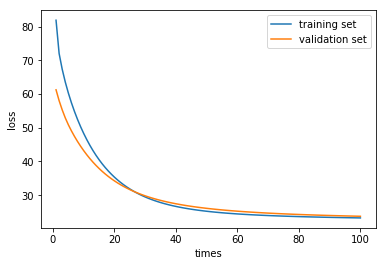

In [134]:
plt.xlabel('times')
plt.ylabel('loss')
plt.plot(time,l_train,label='training set')
plt.plot(time,l_validation,label='validation set')
plt.legend()
plt.show()

In [135]:
min(l_train)

23.267028580865851

In [136]:
min(l_validation)

23.753491557987342